In [1]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii
import pandas as pd

# from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value


warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [13]:
path = r'/home/jin/CIV_Photoionization/Lumin_42/no_ots_lt/CIV_Lumin_42'
Mod = pc.CloudyModel(path, cloudy_version_major=23)
dr = Mod.dr

def read_data (path) :
    data = pd.read_csv(path,sep='\t')
    data_x, data_y = data['Radius_kpc'].to_numpy(), data['Emissivity'].to_numpy()
    data_x_kpc = data_x*kpc
    return data_x_kpc, data_x ,data_y 


def interpolate(find_x,data_x,data_y):
    for ii, dx in enumerate(data_x[-1]):
        if data_x[ii] >= find_x and data_x[ii+1]<= find_x :
            find_y = ((data_y[ii+1] - data_y[0]) / (data_x[ii+1] - data_x[ii]) )*(find_x- data_x[ii]) + data_y[ii]
            print('Find')
            break
    return find_y

def SB(radius, emissivity):
    radius_max = radius.max()
    surface_brightness = np.zeros(len(radius))
    Lumin = np.zeros(len(radius))
    for ii, bb in enumerate(radius):
        surface_brightness[ii] = 2*emissivity[ii] * np.sqrt(radius_max**2 -bb**2)
        Lumin[ii] = surface_brightness[ii] * 4 *np.pi * dr[ii]**2
    total_Lumin = np.sum(Lumin)
    return surface_brightness , np.sum(surface_brightness) , total_Lumin 

path_civ = r'/home/jin/CIV_Photoionization/CIV_emissivity.txt'
path_heii = r'/home/jin/CIV_Photoionization/HeII_emissivity.txt'
path_lya = r'/home/jin/CIV_Photoionization/Lya_emissivity.txt'


In [ ]:
def SB(radius, emissivity):
    radius_max = radius.max()
    surface_brightness = np.zeros(len(radius))
    Lumin = np.zeros(len(radius))
    for ii, bb in enumerate(radius):
        total_sb = 0
        array_R = np.where(radius >= bb)[0]
        for jj, dR in enumerate(array_R):
            total_sb += emissivity[dR] * dr
        
        surface_brightness[ii] = 2*emissivity[ii] * np.sqrt(radius_max**2 -bb**2)
           
    return surface_brightness , np.sum(surface_brightness) 

In [ ]:
array_R = np.where(rad >= bb)[0]

In [10]:
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))
Lum_He2 = float(Mod.get_emis_vol('HE_2_164043A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))

CIV Cloudy and SB Luminosity  5.545817250822179e+39 1.0327242313345097e+40
HeII Cloudy and SB Luminosity  1.3516628202062498e+40 1.6695196889466396e+40


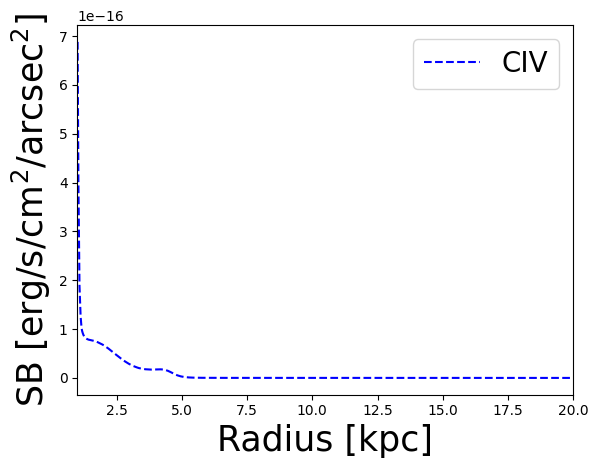

In [11]:
Rad_civ_kpc, Rad_civ, Emiss_civ = read_data(path_civ)

Rad_heii_kpc, Rad_heii, Emiss_heii = read_data(path_heii)

Rad_lya_kpc, Rad_lya, Emiss_lya = read_data(path_lya)

# print(sum(Lumin_heii))

SB_civ , SB_civ_total ,Lumin_civ =  SB(Rad_civ_kpc, Emiss_civ)
SB_heii , SB_heii_total ,Lumin_heii =  SB(Rad_heii_kpc, Emiss_heii)
SB_lya , SB_lya_total ,Lumin_lya =  SB(Rad_heii_kpc, Emiss_heii)

SI_sr_to_arc =  (180*60*60 / np.pi) **2  # sr_to_arcsec2

plt.xlabel('Radius [kpc]',fontsize=25)
plt.ylabel(r'SB $\rm [erg/s/cm^{2}/arcsec^{2}]$',fontsize=25)
# plt.yscale('log')
z = 5
SB_z_civ =SB_civ / (1+z)**3 / SI_sr_to_arc
SB_z_heii =SB_heii / (1+z)**3 / SI_sr_to_arc
SB_z_lya =SB_lya / (1+z)**3 / SI_sr_to_arc

plt.plot(Rad_civ,SB_z_civ,'b--',label='CIV')

plt.xlim(1,xmax=20)
plt.legend(fontsize=20)


print('CIV Cloudy and SB Luminosity ',Lum_C4, Lumin_civ)
print('HeII Cloudy and SB Luminosity ',Lum_He2, Lumin_heii)

# plt.savefig(f'/home/jin/CIV_Photoionization/SB_CLOUDY_42.pdf', dpi=300, bbox_inches='tight')

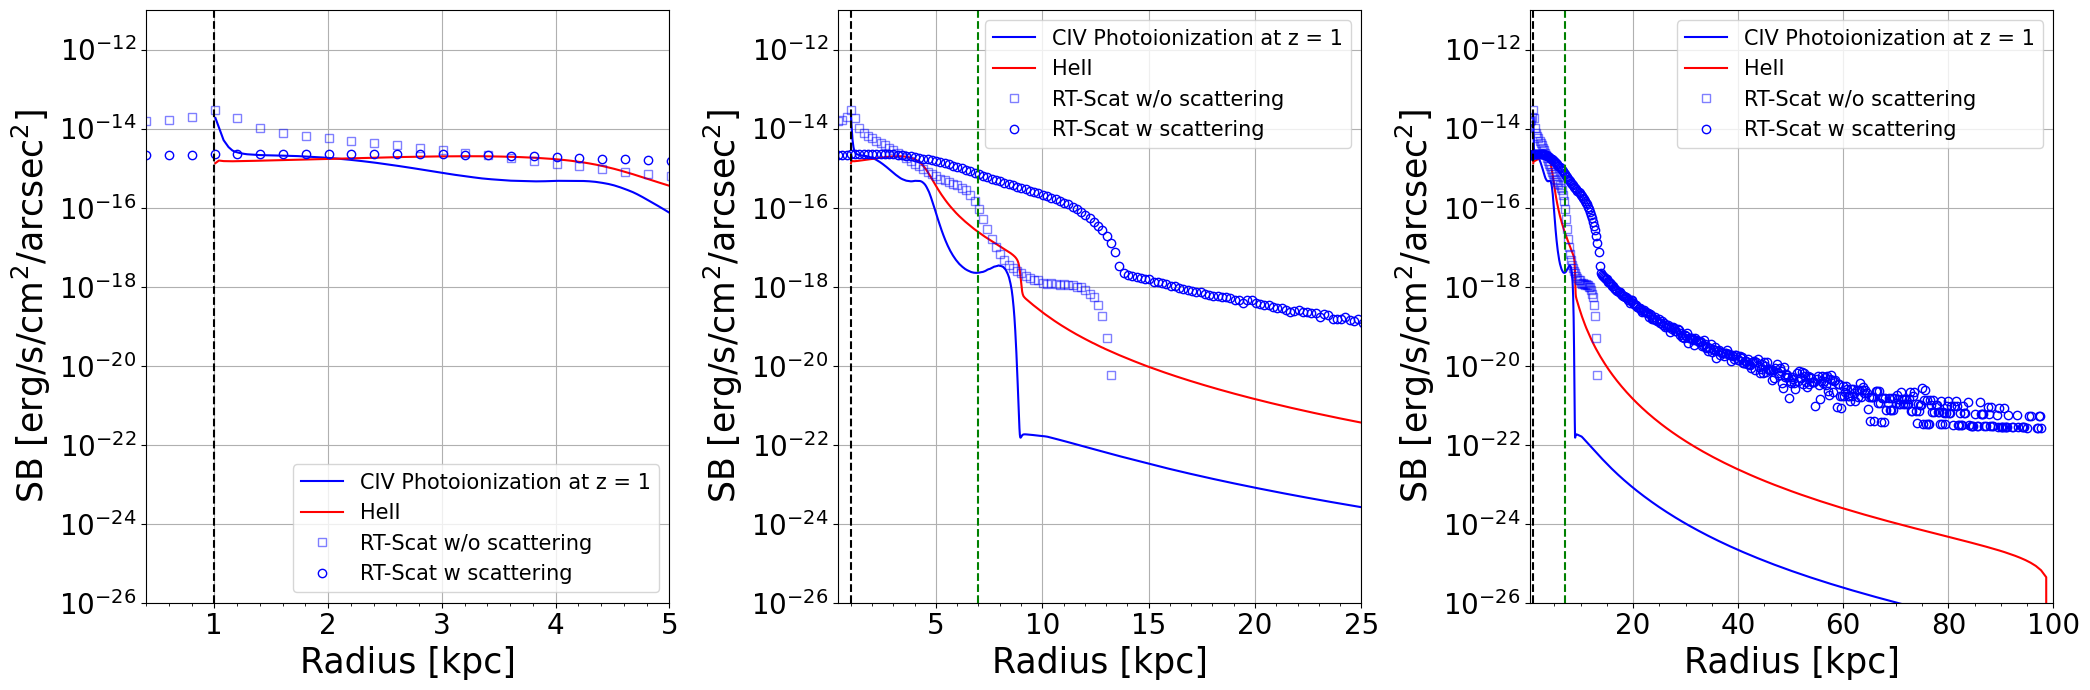

In [12]:
path_radi =  '/home/jin/RT_code/data_CIV/N_atom000E+00_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran118E+01radi.dat'
name = ['radius','SB_K','SB_H','SB_tot','1','2','3']
data_sp = pd.read_csv(path_radi, sep='\s+', header=None,names=name)

rad, SB_t, SB_k,SB_h =  data_sp['radius'].to_numpy(),data_sp['SB_tot'].to_numpy(),data_sp['SB_K'].to_numpy(),data_sp['SB_H'].to_numpy()

path_sc =  '/home/jin/RT_code/data_CIV/N_atom100E+01_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran118E+01radi.dat'
data_sc = pd.read_csv(path_sc, sep='\s+', header=None,names=name)

rad_sc, SB_t_sc, SB_k_sc,SB_h_sc =  data_sc['radius'].to_numpy(),data_sc['SB_tot'].to_numpy(),data_sc['SB_K'].to_numpy(),data_sc['SB_H'].to_numpy()


z = 1 # z = 14 로 설정해야 R = 1kpc 에서 photoionization 이랑 RT-scat 결과의 SB가 같게 나옴.
SB_z_civ =SB_civ / (1+z)**3 / SI_sr_to_arc
SB_z_heii =SB_heii / (1+z)**3 / SI_sr_to_arc
SB_z_lya =SB_lya / (1+z)**3 / SI_sr_to_arc

fig = plt.figure(1,figsize=(21,7))
plt.subplot(131)
plt.plot(Rad_civ,SB_z_civ,'b-',label=r'CIV Photoionization at z = {:}'.format(z))
plt.plot(Rad_heii,SB_z_heii,'r-',label='HeII')
plt.plot(rad/kpc,SB_t,'bs',mfc='None',alpha=0.5,label='RT-Scat w/o scattering')
plt.plot(rad_sc/kpc,SB_t_sc,'bo',mfc='None',alpha=1,label='RT-Scat w scattering')

plt.axvline(x=1,color='k',linestyle='--')
plt.xlim(0.4,5)
plt.ylim(1e-26,1e-11)
plt.yscale('log')
plt.xlabel('Radius [kpc]',fontsize=25)
plt.ylabel(r'SB $\rm [erg/s/cm^{2}/arcsec^{2}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
plt.legend(fontsize=15)


plt.subplot(132)
plt.plot(Rad_civ,SB_z_civ,'b-',label=r'CIV Photoionization at z = {:}'.format(z))
plt.plot(Rad_heii,SB_z_heii,'r-',label='HeII')
plt.plot(rad/kpc,SB_t,'bs',mfc='None',alpha=0.5,label='RT-Scat w/o scattering')
plt.plot(rad_sc/kpc,SB_t_sc,'bo',mfc='None',alpha=1,label='RT-Scat w scattering')
plt.axvline(x=7, color='g',linestyle='--')
plt.axvline(x=1,color='k',linestyle='--')
plt.xlim(0.4,25)
plt.ylim(1e-26,1e-11)
plt.yscale('log')
plt.xlabel('Radius [kpc]',fontsize=25)
plt.ylabel(r'SB $\rm [erg/s/cm^{2}/arcsec^{2}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
plt.legend(fontsize=15)



plt.subplot(133)
plt.plot(Rad_civ,SB_z_civ,'b-',label=r'CIV Photoionization at z = {:}'.format(z))
plt.plot(Rad_heii,SB_z_heii,'r-',label='HeII')
plt.plot(rad/kpc,SB_t,'bs',mfc='None',alpha=0.5,label='RT-Scat w/o scattering')
plt.plot(rad_sc/kpc,SB_t_sc,'bo',mfc='None',alpha=1,label='RT-Scat w scattering')
plt.axvline(x=7, color='g',linestyle='--')
plt.axvline(x=1,color='k',linestyle='--')
plt.xlim(0.4,100)
plt.ylim(1e-26,1e-11)
plt.yscale('log')
plt.xlabel('Radius [kpc]',fontsize=25)
plt.ylabel(r'SB $\rm [erg/s/cm^{2}/arcsec^{2}]$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(True)
plt.legend(fontsize=15)

plt.tight_layout()
# plt.savefig('/home/jin/바탕화면/CIV_RT_Scat_Result.pdf',dpi=100)